# Shotmaps

A shotmap is a visual representation of the shots taken by a player or team during a game. It is a useful tool to understand the shooting tendencies of a player or team.
 
Shotmaps are especially useful if we combine them with expected goals and we can get a better understanding of the quality of the shots taken by a player or team.

It depends on what you are trying to show, but usually a good shot map for analysis of a player/team is all shots excluding penalties.
If you are doing a match report though you might want to include penalties.

We'll use the data from the 2022 World Cup Final to create shotmaps for both France ad Argentina.

In [13]:
# Lets first get our data
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3869685)

/Users/mckayjohns/miniforge3/envs/complete-football-analytics/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [14]:
# Now lets filter just down to the shots data we want
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [15]:
# the shots data is in the 'type' column
df = df[df['type']=='Shot']

# Filter down to just the columns we need
df = df[['team', 'player', 'location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_type']]

In [16]:
df

,team,player,location,shot_outcome,shot_statsbomb_xg,shot_type
4207,Argentina,Alexis Mac Allister,"[92.4, 30.0]",Saved,0.024542,Open Play
4208,Argentina,Rodrigo Javier De Paul,"[99.2, 47.9]",Blocked,0.062813,Open Play
4209,Argentina,Ángel Fabián Di María Hernández,"[103.1, 34.6]",Off T,0.106801,Open Play
4210,Argentina,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",Goal,0.783500,Penalty
4211,Argentina,Alexis Mac Allister,"[94.3, 23.5]",Wayward,0.010578,Open Play
4212,Argentina,Ángel Fabián Di María Hernández,"[111.8, 32.1]",Goal,0.303409,Open Play
4213,Argentina,Rodrigo Javier De Paul,"[103.3, 52.3]",Saved,0.040216,Open Play
4214,Argentina,Julián Álvarez,"[110.5, 24.9]",Saved,0.059534,Open Play
4215,Argentina,Lionel Andrés Messi Cuccittini,"[109.7, 46.0]",Off T,0.115560,Open Play
4216,France,Randal Kolo Muani,"[113.4, 34.6]",Off T,0.096184,Open Play


In [18]:
# Let's get rid of penalties
df = df[df['shot_type'] != 'Penalty']

In [19]:
df

,team,player,location,shot_outcome,shot_statsbomb_xg,shot_type
4207,Argentina,Alexis Mac Allister,"[92.4, 30.0]",Saved,0.024542,Open Play
4208,Argentina,Rodrigo Javier De Paul,"[99.2, 47.9]",Blocked,0.062813,Open Play
4209,Argentina,Ángel Fabián Di María Hernández,"[103.1, 34.6]",Off T,0.106801,Open Play
4211,Argentina,Alexis Mac Allister,"[94.3, 23.5]",Wayward,0.010578,Open Play
4212,Argentina,Ángel Fabián Di María Hernández,"[111.8, 32.1]",Goal,0.303409,Open Play
4213,Argentina,Rodrigo Javier De Paul,"[103.3, 52.3]",Saved,0.040216,Open Play
4214,Argentina,Julián Álvarez,"[110.5, 24.9]",Saved,0.059534,Open Play
4215,Argentina,Lionel Andrés Messi Cuccittini,"[109.7, 46.0]",Off T,0.115560,Open Play
4216,France,Randal Kolo Muani,"[113.4, 34.6]",Off T,0.096184,Open Play
4217,France,Kylian Mbappé Lottin,"[102.5, 27.9]",Off T,0.050644,Open Play


In [23]:
# Lastly, lets fix the location column
df[['x', 'y']] = df['location'].apply(pd.Series)

/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_71048/2802507520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x', 'y']] = df['location'].apply(pd.Series)
/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_71048/2802507520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x', 'y']] = df['location'].apply(pd.Series)


Text(60, 74, 'Size represents xG')

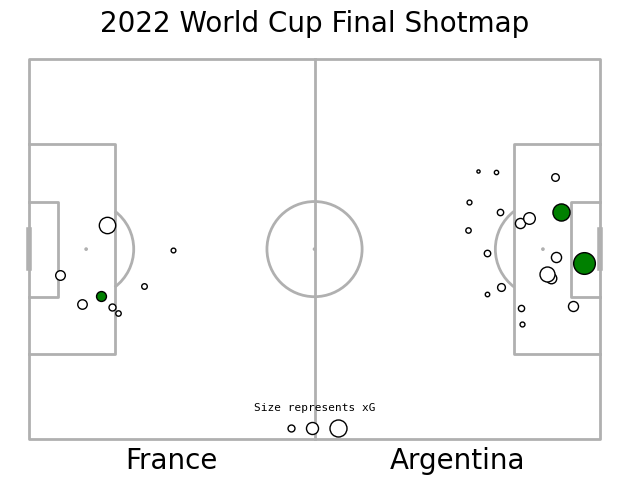

In [80]:
# Let's create our shotmap
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal

for x in df.to_dict(orient='records'):
    if x['team'] == 'France':
        # We want to plot France on the left side of the pitch
        # So we need to mirror both the x and y coordinates
        pitch.scatter(x=120-x['x'], y=80-x['y'], ax=ax, s=500*x['shot_statsbomb_xg'], ec='black', c='green' if x['shot_outcome'] == 'Goal' else 'white')
    else:
        pitch.scatter(x=x['x'], y=x['y'], ax=ax, s=500*x['shot_statsbomb_xg'], ec='black', c='green' if x['shot_outcome'] == 'Goal' else 'white')
        

# We can add a title above the different halves of the pitch
ax.text(30, 86, 'France', ha='center', fontsize=20)
ax.text(90, 86, 'Argentina', ha='center', fontsize=20)

# We can also add a title directly above the text we added
ax.set_title('2022 World Cup Final Shotmap', fontsize=20)

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(55, 77.5, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(59.5, 77.5, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(65, 77.5, s=500*.3, ec='black', c='white', ax=ax)

# We can add a label for the legend
ax.text(60, 74, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')